In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

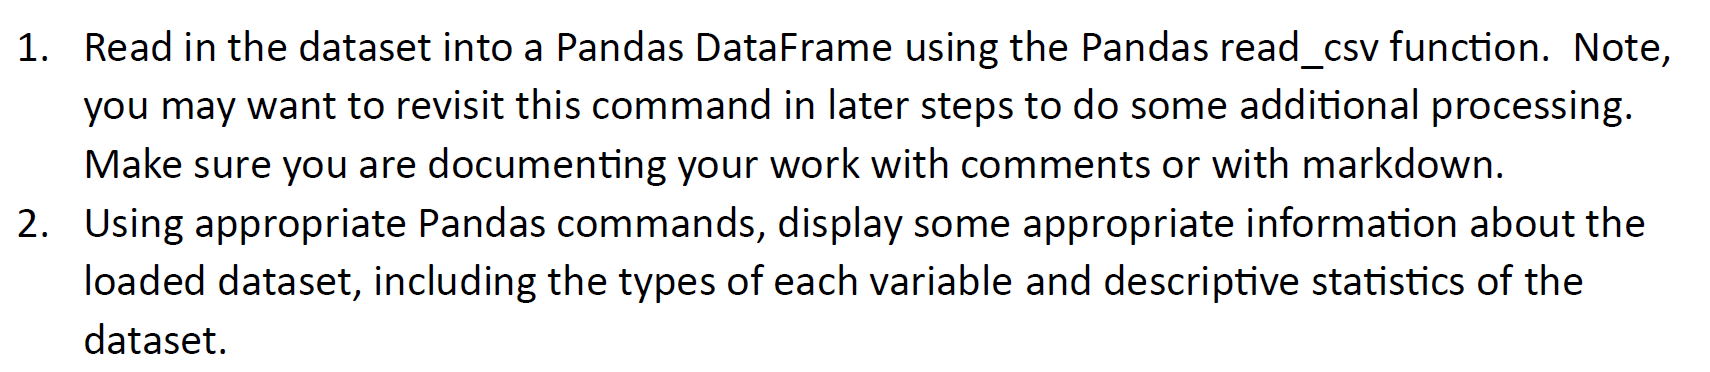

In [122]:
df = pd.read_csv('covid-data.csv') # task 1
df.info() # task 2
print(df.describe(include='all'))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297237 entries, 0 to 297236
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    297237 non-null  object 
 1   continent                                   283089 non-null  object 
 2   location                                    297237 non-null  object 
 3   date                                        297237 non-null  object 
 4   total_cases                                 261401 non-null  float64
 5   new_cases                                   288675 non-null  float64
 6   new_cases_smoothed                          287411 non-null  float64
 7   total_deaths                                240987 non-null  float64
 8   new_deaths                                  288741 non-null  float64
 9   new_deaths_smoothed                         287511 non-null  float64
 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


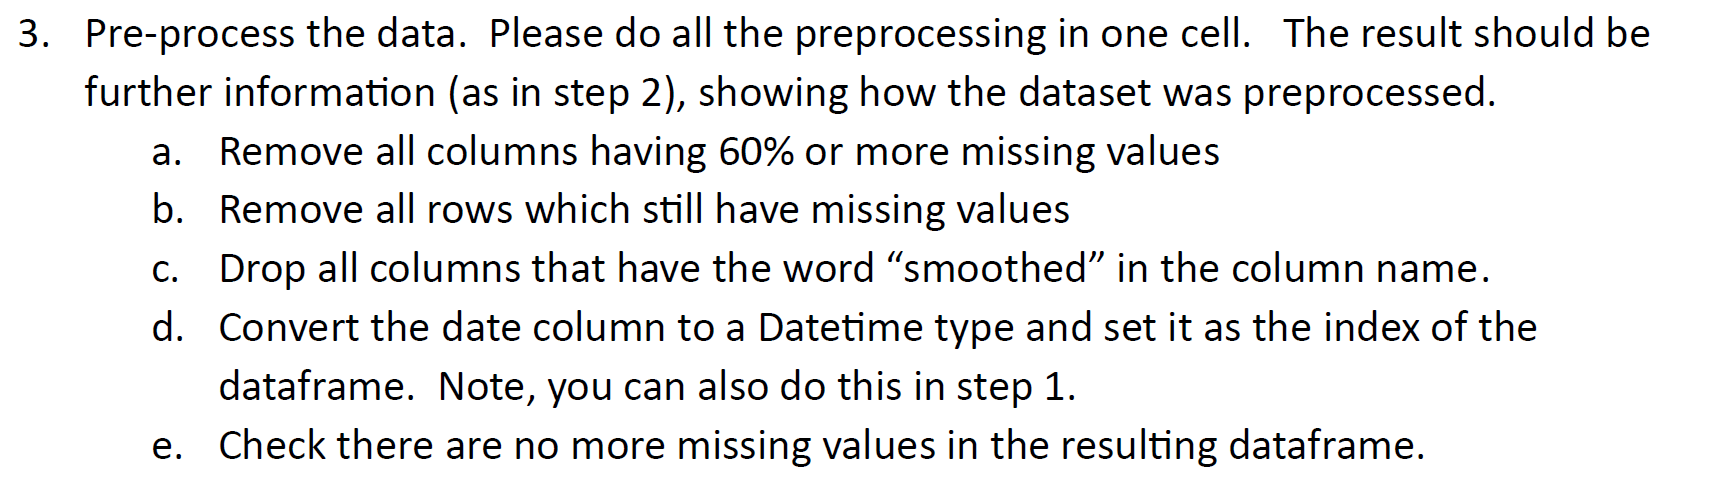

In [123]:
# we can remove all cells have 60% or more missing values by using the thresh parameter of dropna
df_clean = df.dropna(thresh=.4*len(df),axis=1) # require 60% non-na values
df_clean = df_clean.dropna() # now we can dropna directly, which will remove any rows with missing values
df_clean = df_clean.drop(columns=df_clean.filter(regex=r"smoothed"))
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean = df_clean.set_index('date')
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57859 entries, 2021-01-11 to 2022-10-09
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    57859 non-null  object 
 1   continent                   57859 non-null  object 
 2   location                    57859 non-null  object 
 3   total_cases                 57859 non-null  float64
 4   new_cases                   57859 non-null  float64
 5   total_deaths                57859 non-null  float64
 6   new_deaths                  57859 non-null  float64
 7   total_cases_per_million     57859 non-null  float64
 8   new_cases_per_million       57859 non-null  float64
 9   total_deaths_per_million    57859 non-null  float64
 10  new_deaths_per_million      57859 non-null  float64
 11  reproduction_rate           57859 non-null  float64
 12  stringency_index            57859 non-null  float64
 13  population_den

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
date,,,,,,,,,,,,,,,,,,,,,
2021-01-11,ALB,Europe,Albania,63033.0,655.0,1233.0,3.0,22176.618,230.446,433.801,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2021-01-12,ALB,Europe,Albania,63595.0,562.0,1241.0,8.0,22374.344,197.726,436.615,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2021-01-13,ALB,Europe,Albania,63971.0,376.0,1247.0,6.0,22506.630,132.286,438.726,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2021-01-14,ALB,Europe,Albania,64627.0,656.0,1252.0,5.0,22737.428,230.798,440.486,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2021-01-15,ALB,Europe,Albania,65334.0,707.0,1256.0,4.0,22986.168,248.741,441.893,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0


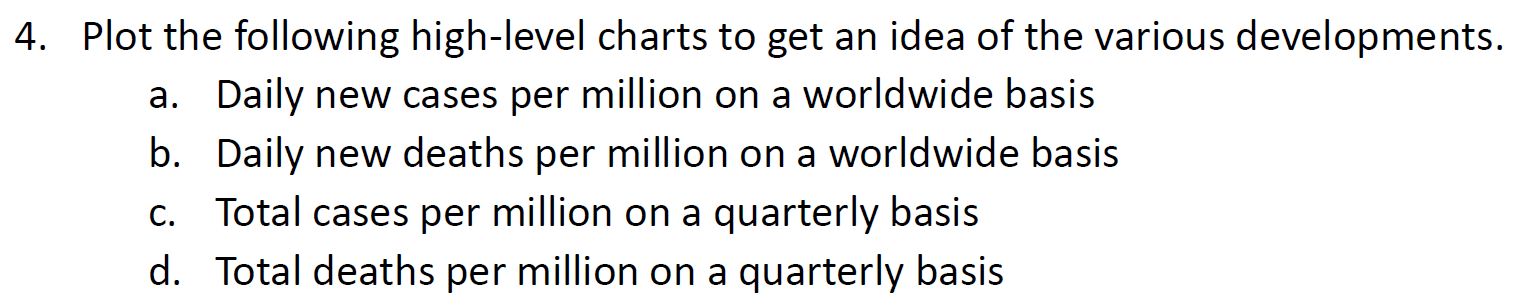

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

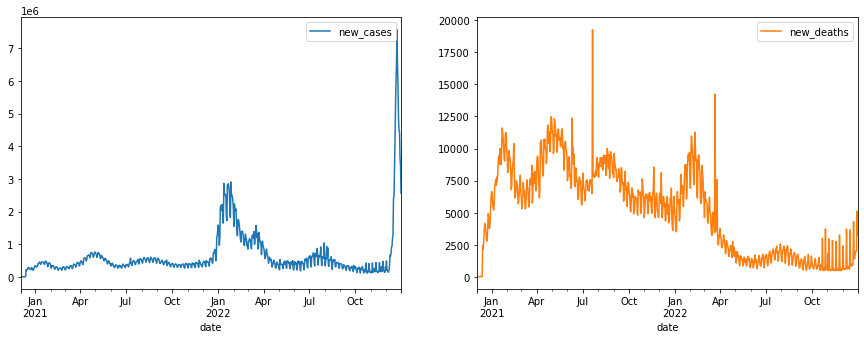

In [124]:
#(I know it says per million, but this is more interesting)
df_clean[['new_cases','new_deaths']].groupby(df_clean.index).sum().plot(figsize=(15,5),subplots=True,layout=(1,2))

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

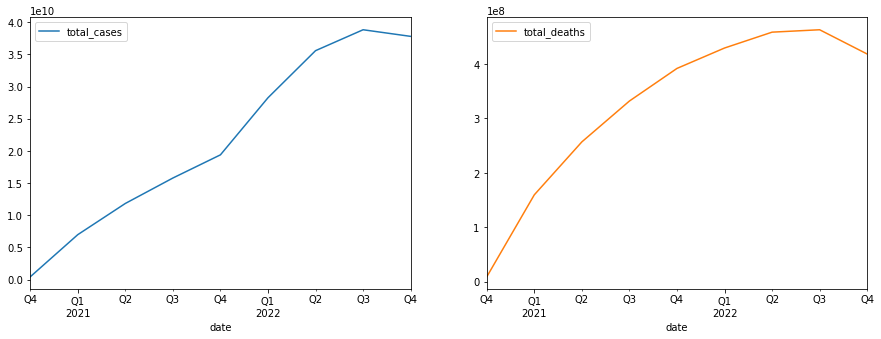

In [125]:
# note, this goes down at the end because we are missing data
df_clean[['total_cases','total_deaths']].groupby(df_clean.index).sum().resample('Q').sum().plot(figsize=(15,5),subplots=True,layout=(1,2))

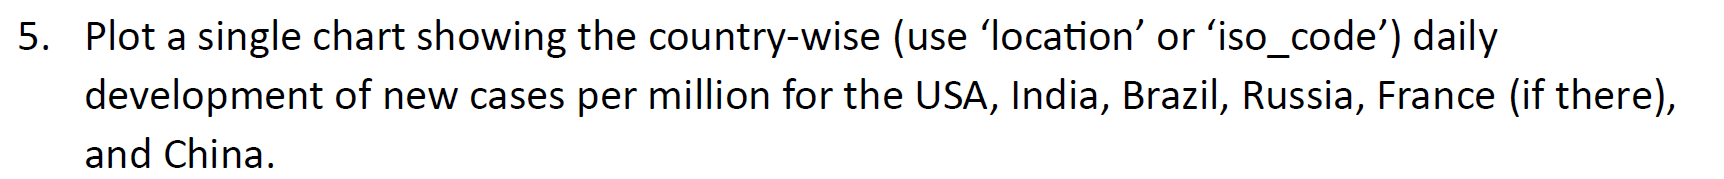

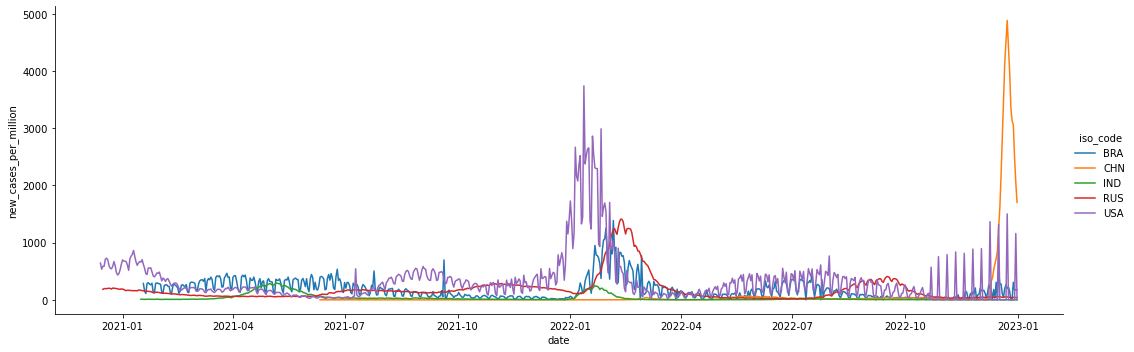

In [132]:
df_major = df_clean[df_clean.iso_code.isin(['USA','FRA','BRA','RUS','IND','CHN'])]
sns.relplot(df_major,x=df_major.index,y='new_cases_per_million',hue='iso_code',kind='line',aspect=3);

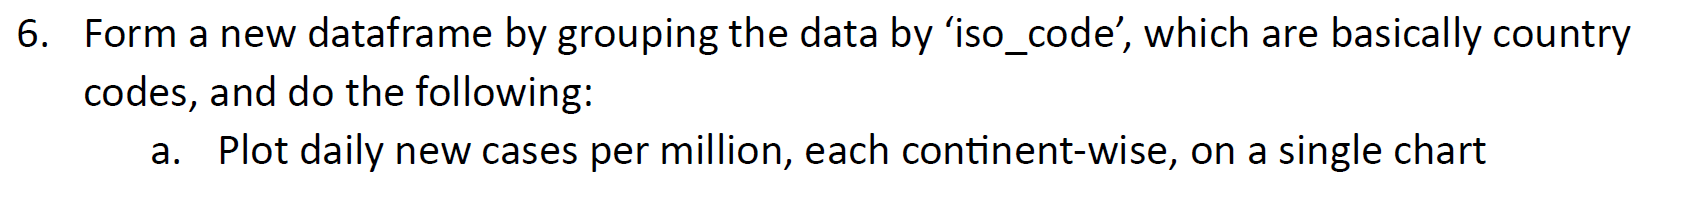
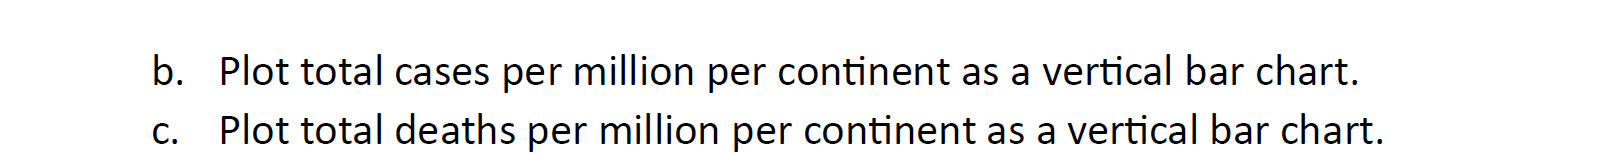

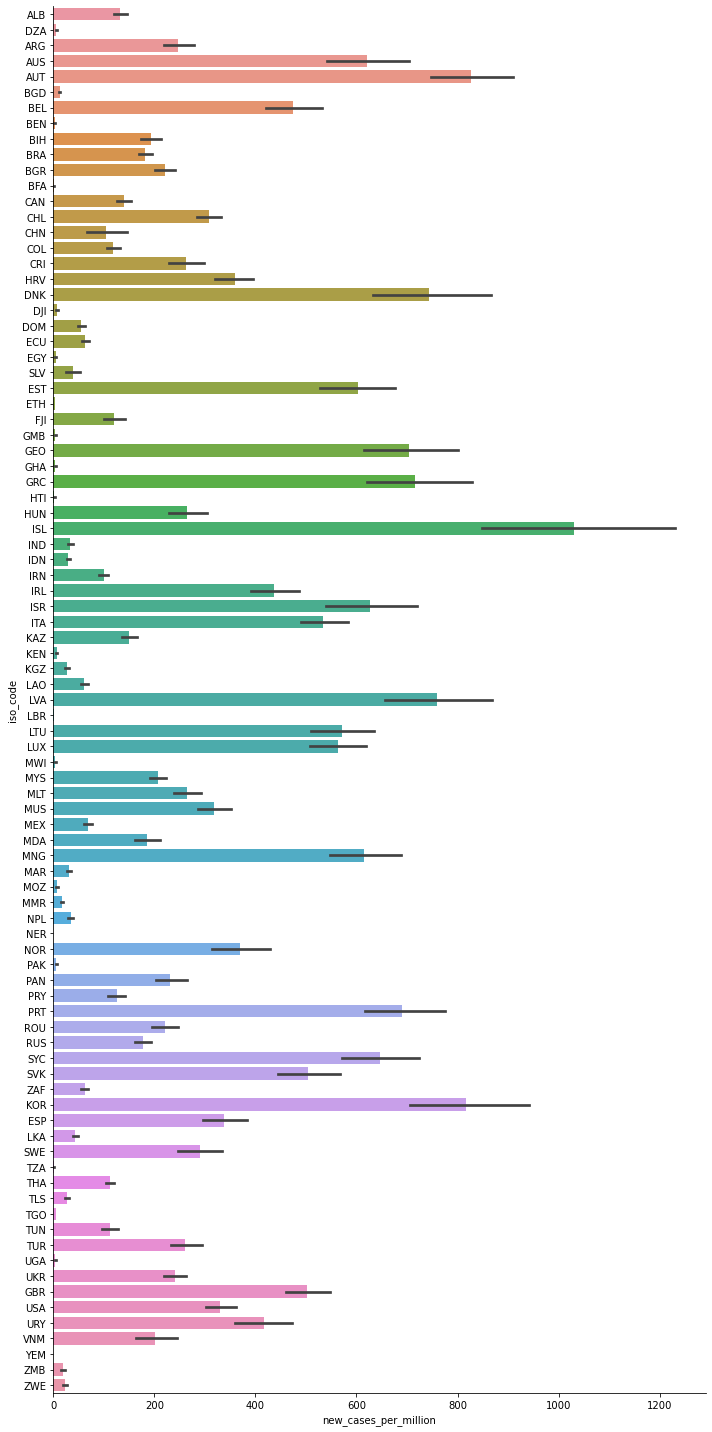

In [147]:
sns.catplot(df_clean,y='iso_code',x='new_cases_per_million',aspect=.5,height=20,kind='bar')

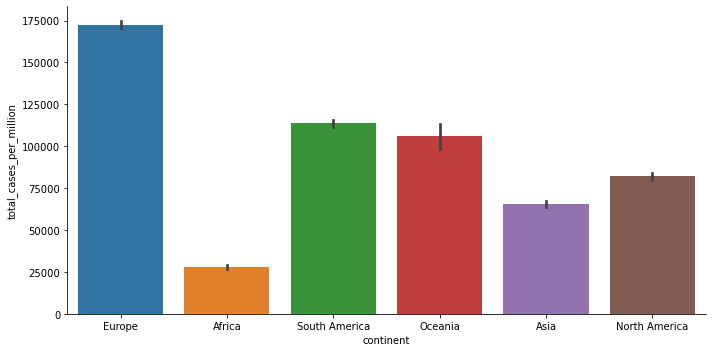

In [150]:
# let's mix it up and do continent now
sns.catplot(df_clean,x='continent',y='total_cases_per_million',aspect=2,height=5,kind='bar')

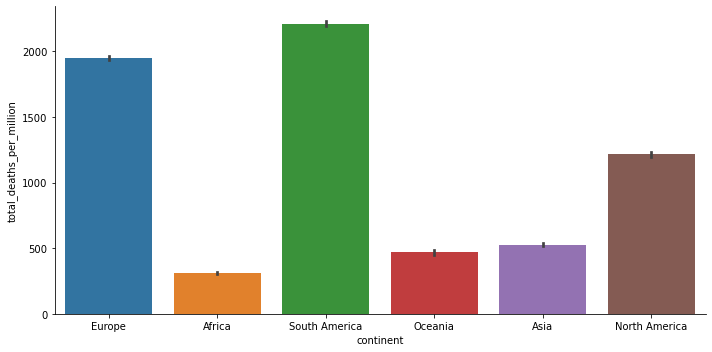

In [151]:
sns.catplot(df_clean,x='continent',y='total_deaths_per_million',aspect=2,height=5,kind='bar')

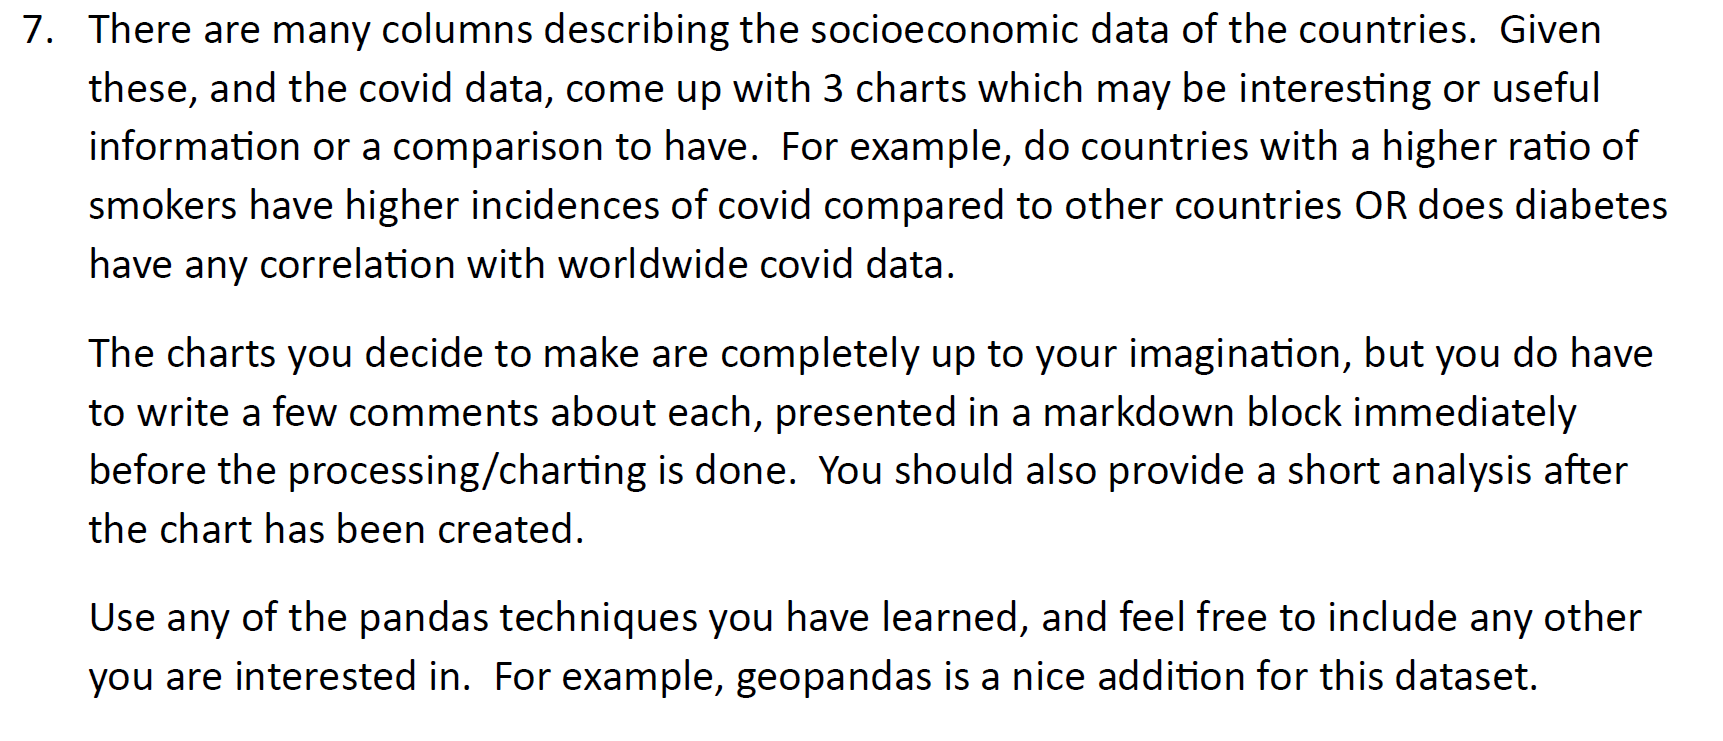

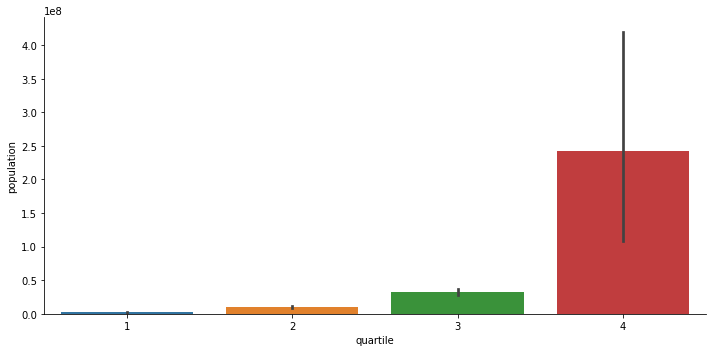

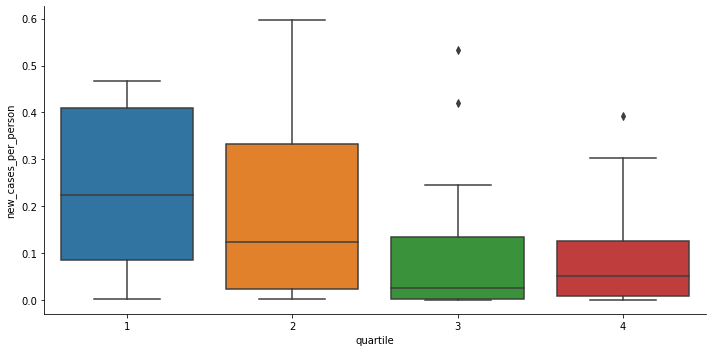

In [188]:
# Q1 - Do larger or smaller countries manage covid well
# First, let's  get the average population of each country, and their new cases
df_temp = df_clean.groupby('iso_code')[['population','new_cases']].agg({'population':'mean','new_cases':'sum'})
# Now, let's look at new_cases/population
df_temp['quartile'] = pd.qcut(df_temp.population,q=4,labels=[1,2,3,4])
df_temp['new_cases_per_person'] = df_temp['new_cases']/df_temp['population']
sns.catplot(df_temp,x='quartile',y='population',kind='bar',aspect=2)
sns.catplot(df_temp,x='quartile',y='new_cases_per_person',kind='box',aspect=2)

The above definitely shows that lower quartile countries had many more new cases per million

,new_cases,new_deaths,human_development_index,death_rate
iso_code,,,,
NER,4507.0,129.0,0.394,0.028622
BFA,8583.0,228.0,0.452,0.026564
MOZ,168908.0,1546.0,0.456,0.009153
YEM,5479.0,888.0,0.470,0.162073
LBR,5907.0,203.0,0.480,0.034366
...,...,...,...,...
AUS,11018254.0,16892.0,0.944,0.001533
SWE,2221092.0,12384.0,0.945,0.005576
ISL,174302.0,66.0,0.949,0.000379


<Axes: xlabel='iso_code'>

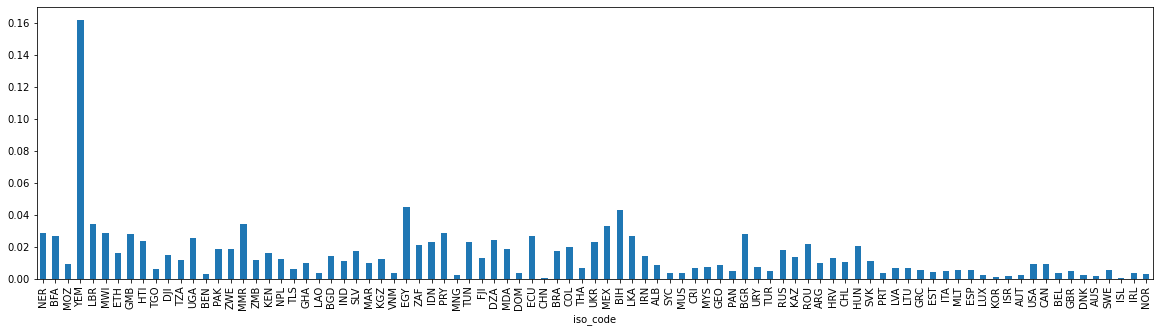

In [239]:
# do countries with a higher human development index have a lower death rate of covid?
# first, we need to figure out the death rate
df_country = df_clean.groupby('iso_code').agg({'new_cases':'sum','new_deaths':'sum','human_development_index':'mean'})
df_country['death_rate'] = df_country['new_deaths']/df_country['new_cases']
df_country = df_country.sort_values('human_development_index')
display(df_country)
df_country['death_rate'].plot.bar(figsize=(20,5))

The above clearly shows a downward trend as human development index goes up, suggesting you had a much higher chance of dying from covid if you were in a counttry with a lower human development index, though there are certainly higher rates in some places.

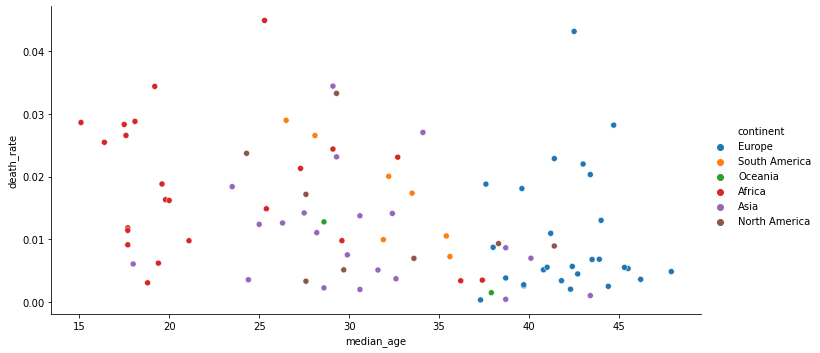

In [257]:
# last question, is there a relationship between the median age in a country and the death rate?
df_country = df_clean.groupby('iso_code').agg({'continent':'first','new_cases':'sum','new_deaths':'sum','median_age':'mean','human_development_index':'mean'})
df_country['death_rate'] = df_country['new_deaths']/df_country['new_cases']
# leaving off the one outlier death rate ("YEM")
sns.relplot(df_country[df_country.death_rate<.15],x='median_age',y='death_rate',hue='continent',height=5,aspect=2)

The above shows that countries with a higher median_age had a lower death rate.  This is highly correlated with country.